In [1]:
## tools

from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [2]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv papers")
print(arxiv.name)

arxiv


In [3]:
arxiv.invoke("What is the latest research on quantum computing?")

'Published: 2023-05-23\nTitle: Fast and energy-efficient non-volatile III-V-on-silicon photonic phase shifter based on memristors\nAuthors: Zhuoran Fang, Bassem Tossoun, Antoine Descos, Di Liang, Xue Huang, Geza Kurczveil, Arka Majumdar, Raymond G. Beausoleil\nSummary: Silicon photonics has evolved from lab research to commercial products in the\npast decade as it plays an increasingly crucial role in data communication for\nnext-generation data centers and high performance computing1. Recently,\nprogr'

In [4]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [5]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
# LangSmith credentials
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] =os.getenv("LANGSMITH_API_KEY")
os.environ["LANGCHAIN_PROJECT"] ="Chatbot_AI_Agent"
# Optional: Set the environment for debugging
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"

In [6]:
### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

C:\Users\HP\AppData\Local\Temp\ipykernel_12076\3584238.py:4: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [7]:
tavily.invoke("Provide me the recent AI news?")

[{'title': 'AI News | Latest AI News, Analysis & Events',
  'url': 'https://www.artificialintelligence-news.com/',
  'content': 'AI News reports on the latest artificial intelligence news and insights. Explore industry trends from the frontline of AI.',
  'score': 0.650934},
 {'title': 'AI News & Artificial Intelligence | TechCrunch',
  'url': 'https://techcrunch.com/category/artificial-intelligence/',
  'content': '### [Observability startup Coralogix becomes a unicorn, eyes India expansion](https://techcrunch.com/2025/06/17/observability-startup-coralogix-becomes-a-unicorn-eyes-india-expansion/)\n\n![Microsoft CEO Satya Nadella speaks during the OpenAI DevDay event on November 06, 2023 in San Francisco, California.](https://techcrunch.com/wp-content/uploads/2023/11/GettyImages-1778706501.jpg?w=666) [...] ### [Meta is reportedly building AI smart glasses with Prada, too](https://techcrunch.com/2025/06/17/meta-is-reportedly-building-ai-smart-glasses-with-prada-too/)\n\n![Intel Headquar

In [8]:
## combine all these tools in the list
tools=[arxiv, wiki, tavily]

In [9]:
## Initialize the LLM Model
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-qwq-32b")


In [10]:
llm.invoke("What is AI")

AIMessage(content='\n<think>\nOkay, so I need to explain what AI is. Let me start by recalling what I know. AI stands for Artificial Intelligence. I think it\'s when machines can perform tasks that usually require human intelligence. But wait, how exactly does that work? Maybe I should break it down into parts. There\'s general AI and narrow AI. General AI is like human-like intelligence that can handle various tasks, but I remember that\'s still theoretical. Most AI today is narrow, right? Like Siri or Alexa, they can do specific things but not everything.\n\nHmm, how do they work? Oh, right, machine learning is a part of AI. Machine learning involves training models on data so they can make predictions or decisions. Neural networks are part of that, modeled after the human brain. Maybe I should mention deep learning too, which is a subset of ML using deep neural networks. But wait, there\'s more to AI than just ML. There\'s also rule-based systems, like expert systems that use if-the

In [11]:
llm_with_tools=llm.bind_tools(tools=tools)


In [12]:
## Execute this call
llm_with_tools.invoke("What is the recent news on AI?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ck6pz4tw7', 'function': {'arguments': '{"query":"recent news on AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 190, 'prompt_tokens': 270, 'total_tokens': 460, 'completion_time': 0.437715824, 'prompt_time': 0.033158643, 'queue_time': 0.04746088699999999, 'total_time': 0.470874467}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_6b36369676', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--4792d4dd-fa3b-4ff9-9a4d-a0619fa1aeb4-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent news on AI'}, 'id': 'ck6pz4tw7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 270, 'output_tokens': 190, 'total_tokens': 460})

In [13]:
## Execute this call
llm_with_tools.invoke("What is the latest research on quantum computing?")


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'e52ved3xx', 'function': {'arguments': '{"query":"latest research on quantum computing"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 246, 'prompt_tokens': 271, 'total_tokens': 517, 'completion_time': 0.579779727, 'prompt_time': 0.023582613, 'queue_time': 0.050892857, 'total_time': 0.60336234}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_6b36369676', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--c36f54cc-5bbe-4e89-a314-bf71a2271cb1-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'latest research on quantum computing'}, 'id': 'e52ved3xx', 'type': 'tool_call'}], usage_metadata={'input_tokens': 271, 'output_tokens': 246, 'total_tokens': 517})

In [14]:
## Execute this call
llm_with_tools.invoke("What is machine learning?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'eg0haq75c', 'function': {'arguments': '{"query":"machine learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 270, 'prompt_tokens': 267, 'total_tokens': 537, 'completion_time': 0.623687075, 'prompt_time': 0.022389479, 'queue_time': 0.18416121700000002, 'total_time': 0.646076554}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_6b36369676', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--64d61223-95b4-4234-97f1-ec526c3e1a4d-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'machine learning'}, 'id': 'eg0haq75c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 267, 'output_tokens': 270, 'total_tokens': 537})

## Workflow 

In [15]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage ## Human message or AI message
from typing import Annotated  ## labelling
from langgraph.graph.message import add_messages  ## Reducers in Langgraph

In [16]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    

In [17]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [18]:
# ### Node definition
# def tool_calling_llm(state:State):
#     return {"messages":[llm_with_tools.invoke(state["messages"])]}

# # Build graph
# builder = StateGraph(State)
# builder.add_node("tool_calling_llm", tool_calling_llm)
# builder.add_node("tools", ToolNode(tools))

# ## Edgess
# builder.add_edge(START, "tool_calling_llm")
# builder.add_conditional_edges(
#     "tool_calling_llm",
#     # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
#     # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
#     tools_condition,
# )
# builder.add_edge("tools", END)

# graph = builder.compile()

# # View
# display(Image(graph.get_graph().draw_mermaid_png()))

In [19]:
# messages=graph.invoke({"messages":"1706.03762"})
# for m in messages['messages']:
#     m.pretty_print()

In [20]:
# messages=graph.invoke({"messages":"Hi My name is Hardik"})
# for m in messages['messages']:
#     m.pretty_print()

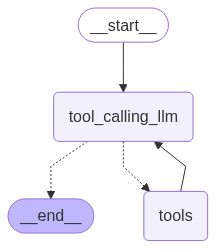

In [21]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "tool_calling_llm")

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
#Tracing on Langsmith
from langchain_core.runnables import Runnable

# Wrap LangGraph app for tracing (works with any LLM, including Groq)
# graph is already a Runnable
traced_app = graph.with_config({
    "run_name": "Chatbot_AI_Agent"
})

# User input
input_state = {
    "messages": [
        {"role": "user", "content": "What is the recent AI news and then please tell me the recent research paper on quantum computing?"}
    ]
}


# Invoke and trace
response = traced_app.invoke(input_state)
print(response)


{'messages': [HumanMessage(content='What is the recent AI news and then please tell me the recent research paper on quantum computing?', additional_kwargs={}, response_metadata={}, id='94e58325-a72f-4367-8364-e42524f88fa8'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'fgg7gjq05', 'function': {'arguments': '{"query":"latest news about AI advancements"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}, {'id': 'vcsxm71m4', 'function': {'arguments': '{"query":"recent quantum computing research papers"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 233, 'prompt_tokens': 281, 'total_tokens': 514, 'completion_time': 0.548088566, 'prompt_time': 0.066416134, 'queue_time': 0.045531666, 'total_time': 0.6145047}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_6b36369676', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d865b46e-ba62-4bb7-990d-1749d38fa92d-0', tool_calls=[{'name': 'tavily_search

In [ ]:
# messages=graph.invoke({"messages":"What is the recent AI news and then please tell me the recent research paper on quantum computing?"})
# for m in messages['messages']:
#     m.pretty_print()

================================ Human Message =================================

What is the recent AI news and then please tell me the recent research paper on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (ygaynjzd5)
 Call ID: ygaynjzd5
  Args:
    query: Recent AI news
  arxiv (qz5251x6p)
 Call ID: qz5251x6p
  Args:
    query: Recent research papers on quantum computing
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "AI News & Artificial Intelligence | TechCrunch", "url": "https://techcrunch.com/category/artificial-intelligence/", "content": "### [Sequoia-backed Crosby launches a new kind of AI-powered law firm](https://techcrunch.com/2025/06/17/sequoia-backed-crosby-launches-a-new-kind-of-ai-powered-law-firm/)\n\n![Microsoft CEO Satya Nadella speaks during the OpenAI DevDay event on November 06, 2023 in San Fr